In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [453]:
df = pd.read_csv('USA_Housing.csv')
pd.set_option('display.float_format', '{:.2f}'.format)
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64,6.00,6.73,3.09,40173.07,1505890.91,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.07,5.87,8.51,5.13,36882.16,1058987.99,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24,7.19,5.59,3.26,34310.24,1260616.81,USS Barnett\nFPO AP 44820
4,59982.20,5.04,7.84,4.23,26354.11,630943.49,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94,7.83,6.14,3.46,22837.36,1060193.79,USNS Williams\nFPO AP 30153-7653
4996,78491.28,7.00,6.58,4.02,25616.12,1482617.73,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.69,7.25,4.81,2.13,33266.15,1030729.58,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33,5.53,7.13,5.44,42625.62,1198656.87,USS Wallace\nFPO AE 73316


In [454]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [456]:
df.drop(columns=['Address'],inplace=True,axis=1)

<Axes: ylabel='Area Population'>

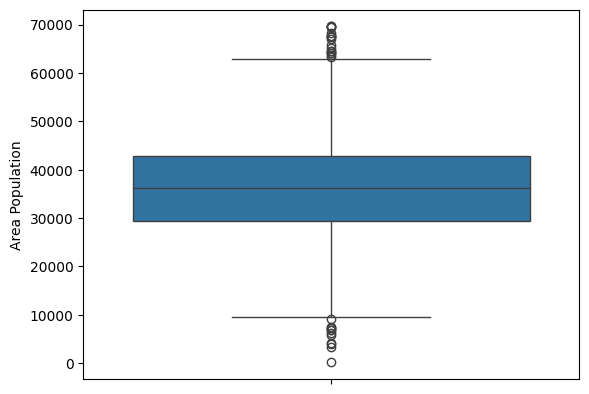

In [457]:
sns.boxplot(df['Area Population'])

<Axes: ylabel='Area Population'>

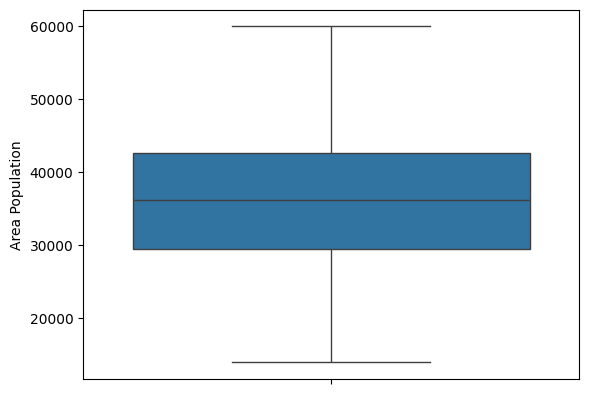

In [458]:
df = df[(df['Area Population'] <= df['Area Population'].quantile(0.99)) & (df['Area Population'] >= df['Area Population'].quantile(0.01))]
sns.boxplot(df['Area Population'])

<Axes: ylabel='Avg. Area House Age'>

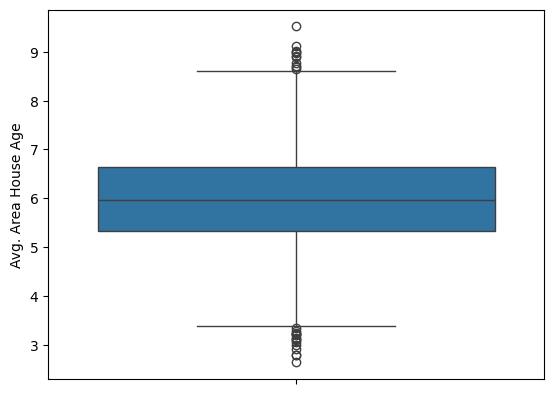

In [459]:
sns.boxplot(df['Avg. Area House Age'])

<Axes: ylabel='Avg. Area House Age'>

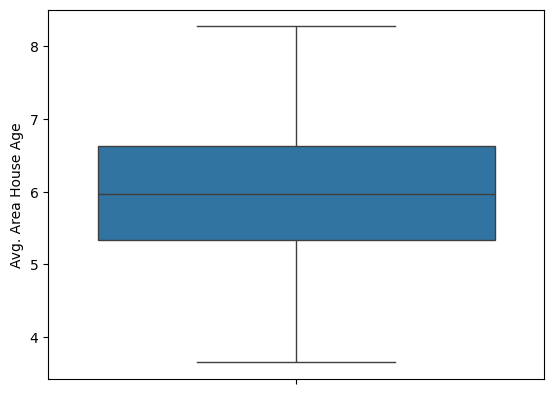

In [460]:
df = df[(df['Avg. Area House Age'] >= df['Avg. Area House Age'].quantile(0.01)) & (df['Avg. Area House Age'] <= df['Avg. Area House Age'].quantile(0.99))]
sns.boxplot(df['Avg. Area House Age'])

<Axes: ylabel='Avg. Area Income'>

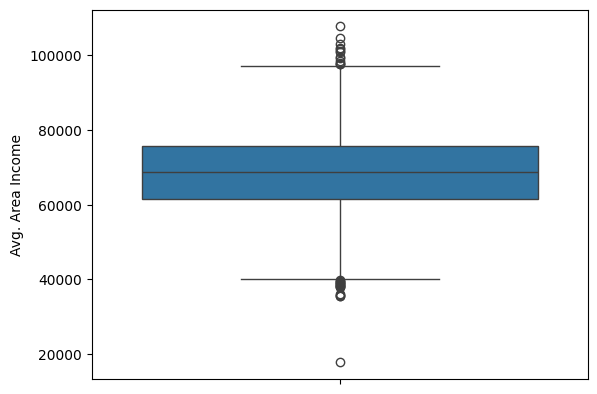

In [461]:
sns.boxplot(df['Avg. Area Income'])

<Axes: ylabel='Avg. Area Income'>

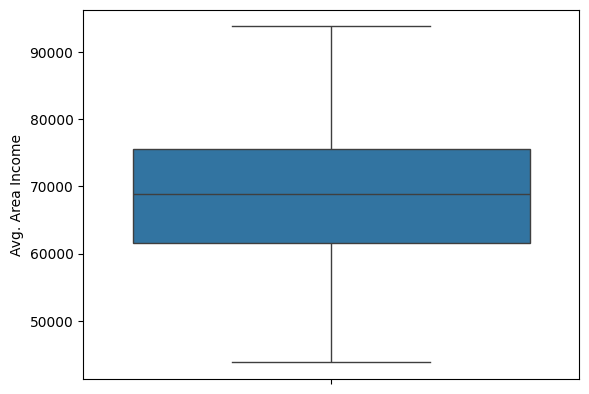

In [462]:
df = df[(df['Avg. Area Income'] >= df['Avg. Area Income'].quantile(0.01)) & (df['Avg. Area Income'] <= df['Avg. Area Income'].quantile(0.99))]
sns.boxplot(df['Avg. Area Income'])

<Axes: ylabel='Avg. Area Number of Bedrooms'>

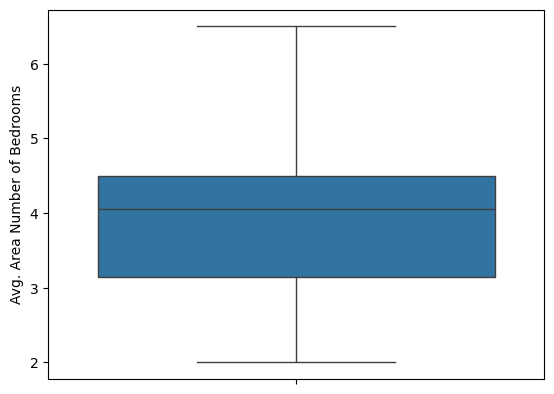

In [463]:
sns.boxplot(df['Avg. Area Number of Bedrooms'])

<Axes: ylabel='Avg. Area Number of Rooms'>

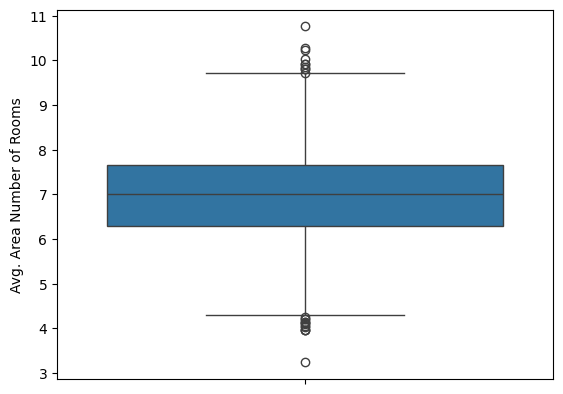

In [464]:
sns.boxplot(df['Avg. Area Number of Rooms'])

<Axes: ylabel='Avg. Area Number of Rooms'>

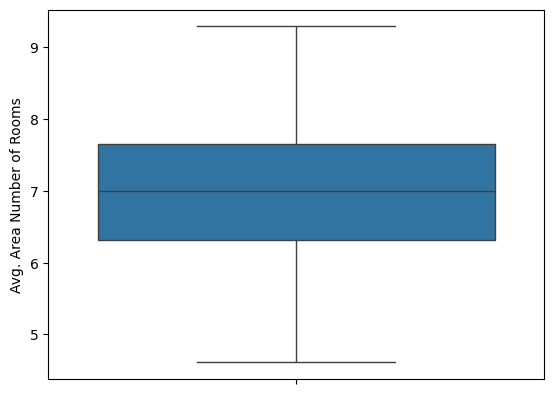

In [465]:
df = df[(df['Avg. Area Number of Rooms'] >= df['Avg. Area Number of Rooms'].quantile(0.01)) & (df['Avg. Area Number of Rooms'] <= df['Avg. Area Number of Rooms'].quantile(0.99))]
sns.boxplot(df['Avg. Area Number of Rooms'])

<Axes: ylabel='Price'>

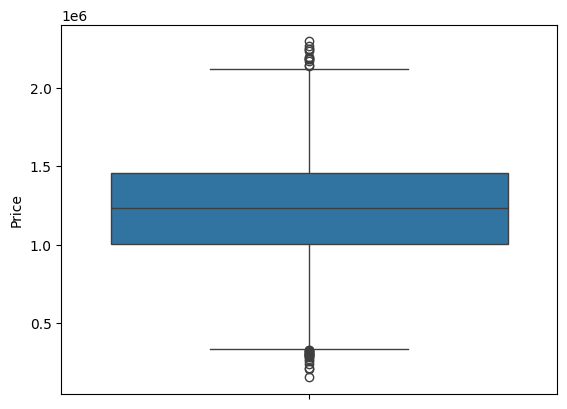

In [466]:
sns.boxplot(df['Price'])

<Axes: ylabel='Price'>

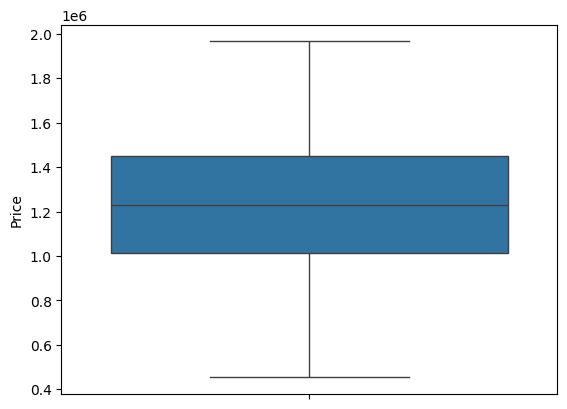

In [467]:
df = df[(df['Price'] >= df['Price'].quantile(0.01)) & (df['Price'] <= df['Price'].quantile(0.99))]
sns.boxplot(df['Price'])

<Axes: >

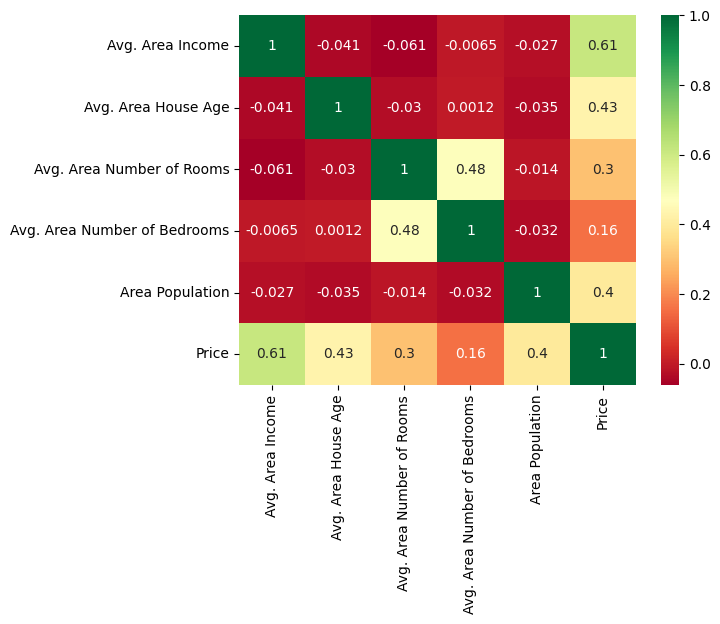

In [468]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [469]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = df.pop("Price")
dfx = df

In [470]:
dfx_train,dfx_test,y_train,y_test = train_test_split(dfx,y,test_size=0.2,random_state=42)

In [471]:
scaler.fit(dfx_train)
x_train = scaler.transform(dfx_train)
x_test = scaler.transform(dfx_test)

In [472]:
df.nunique()

Avg. Area Income                4514
Avg. Area House Age             4514
Avg. Area Number of Rooms       4514
Avg. Area Number of Bedrooms     255
Area Population                 4514
dtype: int64

In [473]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_train = lr.predict(x_train)
lr_test = lr.predict(x_test)

print("Linear Regression:")

print("Train: ", r2_score(y_train,lr_train))

print("Test: ",r2_score(y_test,lr_test))

Linear Regression:
Train:  0.8970635633787439
Test:  0.8949180283044598


In [474]:
dtree = DecisionTreeRegressor(max_depth=10)
dtree.fit(x_train,y_train)
dtree_train = dtree.predict(x_train)
dtree_test = dtree.predict(x_test)

print("Decisin Tree Regression:")

print("Train: ", r2_score(y_train,dtree_train))

print("Test: ",r2_score(y_test,dtree_test))

Decisin Tree Regression:
Train:  0.9518404147049738
Test:  0.7503954422559923


In [475]:
grad = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.1)
grad.fit(x_train,y_train)
grad_train = grad.predict(x_train)
grad_test = grad.predict(x_test)

print("Gradient Boosting Regression:")

print("Train: ", r2_score(y_train,grad_train))

print("Test: ",r2_score(y_test,grad_test))

Gradient Boosting Regression:
Train:  0.9604502887940586
Test:  0.8725063915469337


In [476]:
xgb = XGBRegressor(n_estimators=5000,eta=0.005,max_depth=5,alpha=5,lamda=10)
xgb.fit(x_train,y_train)
xgb_train = xgb.predict(x_train)
xgb_test = xgb.predict(x_test)

print("XGBoost Regression:")

print("Train: ", r2_score(y_train,xgb_train))

print("Test: ",r2_score(y_test,xgb_test))

XGBoost Regression:
Train:  0.9578073221713604
Test:  0.8796707644335965
